# Plotting maps with geopandas and matplotlib

## Plain English summary

This notebook is a basic demo of using `geopandas` and `matplotlib` to create the following map:

![Image of the map created in this notebook using geopandas and matplotlib. All of the LSOAs in Devon and Cornwall are shown in random colours, and the locations of stroke units are marked.](example_map_geopandas.jpg)

In the map, different areas are given different colours according to some dummy data value. The locations of some stroke units are also marked.

The notebook imports the following sets of data:

| File name | Type | Description |
| --- | --- | --- |
| `example_lsoa_englandwales.csv` | Table | A list of example data for all LSOAs in England and Wales. Each LSOA has a number from 1 to 10 in the "Value" column. This is meaningless dummy data. |
| `LSOA_regions.csv` | Table | A list of all LSOAs in England and Wales and the larger regions that they are parts of, e.g. Local Health Boards. |
| `stroke_hospitals_2022.csv` | Table | A list of stroke units in England and Wales. Their postcodes and coordinates in latitude and longitude are included. |
| `LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson` | Coordinates | A list of coordinates defining the border of each LSOA in England and Wales. |

__Reference document:__ [MUSTER stroke outcome pilot](https://github.com/stroke-modelling/muster/blob/dev/temp/analysis.ipynb) (link might break)

## Setup

Import the following packages:

In [1]:
import numpy as np
import pandas as pd

import geopandas
import matplotlib.pyplot as plt

Look for data in these places:

In [2]:
paths = dict(
    dir_data_input = '../data_example/',
    dir_data_geojson = '../data_geojson/',
    dir_data_tabular = '../data_tabular/',
    values_file = 'example_lsoa_englandwales.csv',
    lsoa_geojson = 'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
    lsoa_regions = 'LSOA_regions.csv',
    stroke_hospitals = 'stroke_hospitals_2022.csv'
)

## Import example data

In [3]:
data_file = f"{paths['dir_data_input']}{paths['values_file']}"
lsoa_values = pd.read_csv(data_file)

In [4]:
lsoa_values.columns

Index(['LSOA11NM', 'Value'], dtype='object')

In [5]:
lsoa_values.index

RangeIndex(start=0, stop=34752, step=1)

In [6]:
lsoa_values.head(3)

,LSOA11NM,Value
0,Adur 001A,1
1,Adur 001B,2
2,Adur 001C,3


## Import region coordinates

In [7]:
geojson_file =f"{paths['dir_data_geojson']}{paths['lsoa_geojson']}"
lsoa_gdf = geopandas.read_file(geojson_file)#, crs='EPSG:27700')

In [8]:
lsoa_gdf.columns

Index(['OBJECTID', 'LSOA11CD', 'LSOA11NM', 'LSOA11NMW', 'BNG_E', 'BNG_N',
       'LONG', 'LAT', 'Shape__Area', 'Shape__Length', 'GlobalID', 'geometry'],
      dtype='object')

In [9]:
lsoa_gdf.index

RangeIndex(start=0, stop=34753, step=1)

In [10]:
lsoa_gdf.head(3)

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry
0,1,E01000001,City of London 001A,City of London 001A,532129,181625,-0.09706,51.51810,157794.481079,1685.391778,b12173a3-5423-4672-a5eb-f152d2345f96,"POLYGON ((-0.09474 51.52060, -0.09546 51.51544..."
1,2,E01000002,City of London 001B,City of London 001B,532480,181699,-0.09197,51.51868,164882.427628,1804.828196,90274dc4-f785-4afb-95cd-7cc1fc9a2cad,"POLYGON ((-0.08810 51.51941, -0.09546 51.51544..."
2,3,E01000003,City of London 001C,City of London 001C,532245,182036,-0.09523,51.52176,42219.805717,909.223277,7e89d0ba-f186-45fb-961c-8f5ffcd03808,"POLYGON ((-0.09453 51.52205, -0.09274 51.52139..."


## Import hospital locations

In [11]:
hospitals_file = f"{paths['dir_data_tabular']}{paths['stroke_hospitals']}"
hospitals_gdf = geopandas.read_file(hospitals_file)

Create coordinates from the longitude and latitude columns in the file. If necessary, change the projection.

In [12]:
# Create coordinates:
hospitals_gdf.geometry = geopandas.points_from_xy(
    hospitals_gdf.long,
    hospitals_gdf.lat
)

# Update projection:
hospitals_gdf = hospitals_gdf.set_crs(epsg=4326)
# hospitals_gdf = hospitals_gdf.to_crs(epsg=27700)

In [13]:
hospitals_gdf.columns

Index(['Postcode', 'Hospital_name', 'Use_IVT', 'Use_MT', 'Use_MSU', 'Country',
       'Strategic Clinical Network', 'Health Board / Trust', 'Stroke Team',
       'SSNAP name', 'Admissions 21/22', 'Thrombolysis', 'ivt_rate', 'Easting',
       'Northing', 'long', 'lat', 'Neuroscience',
       '30 England Thrombectomy Example', 'hospital_city', 'Notes',
       'geometry'],
      dtype='object')

In [14]:
hospitals_gdf.index

RangeIndex(start=0, stop=141, step=1)

In [15]:
hospitals_gdf.head(3)

,Postcode,Hospital_name,Use_IVT,Use_MT,Use_MSU,Country,Strategic Clinical Network,Health Board / Trust,Stroke Team,SSNAP name,...,ivt_rate,Easting,Northing,long,lat,Neuroscience,30 England Thrombectomy Example,hospital_city,Notes,geometry
0,RM70AG,RM70AG,1,1,1,England,London SCN,Barking,Havering and Redbridge University Hospitals N...,Queens Hospital Romford HASU,...,11.9,551118,187780,0.179030640661934,51.5686465521504,1,0,Romford,,POINT (0.17903 51.56865)
1,E11BB,E11BB,1,1,1,England,London SCN,Barts Health NHS Trust,The Royal London Hospital,Royal London Hospital HASU,...,13.4,534829,181798,-0.0581329916047372,51.5190178361295,1,1,Royal London,,POINT (-0.05813 51.51902)
2,SW66SX,SW66SX,1,1,1,England,London SCN,Imperial College Healthcare NHS Trust,"Charing Cross Hospital, London",Charing Cross Hospital HASU,...,9.9,524226,176487,-0.212736111308184,51.4737165811988,1,1,Charing Cross,,POINT (-0.21274 51.47372)


## Limit region info to just Devon and Cornwall

Read in this file of region information for each LSOA. It includes the following data:

| Column name | Description | Usage |
| --- | --- | --- | 
| LSOA11 CD / NM | LSOA 2011 codes / names | England & Wales |
| long / lat | Longitude and latitude of the centroid of the LSOA | England & Wales |
| CCG19 CD / NM | Clinical Commissioning Groups 2019 codes / names | England |
| ICB22 CD / NM | Integrated Care Board 2022 codes / names. Replacement for CCGs. | England |
| STP19 CD / NM | Sustainability and Transformation Partnerships codes / names (~similar to counties) | England |
| LHB20 CD / NM / NMW | Local Health Boards 2020 codes / names / Welsh names | Wales |
| RGN11 CD / NM | Region codes / names. Gives specific regions within England, but Wales and Scotland just get the country name. | England & Wales |
| LAD17 CD / NM | Local Authority District 2017 codes / names | England & Wales |
| SCN17 CD/NM | Strategic Clinical Network 2017 codes / names | England |

In [16]:
region_file = f"{paths['dir_data_tabular']}{paths['lsoa_regions']}"
lsoa_regions = pd.read_csv(region_file)

In [17]:
lsoa_regions.columns

Index(['LSOA11CD', 'LSOA11NM', 'LSOA11LONG', 'LSOA11LAT', 'CCG19CD', 'CCG19NM',
       'STP19CD', 'STP19NM', 'LHB20CD', 'LHB20NM', 'LHB20NMW', 'LAD17CD',
       'LAD17NM', 'SCN17CD', 'SCN17NM', 'RGN11CD', 'RGN11NM'],
      dtype='object')

In [18]:
lsoa_regions.index

RangeIndex(start=0, stop=34752, step=1)

Only keep rows of data that belong to "Devon" and "Cornwall and the Isles of Scilly":

In [19]:
mask = (
    (lsoa_regions['STP19NM'] == 'Devon') |
    (lsoa_regions['STP19NM'] == 'Cornwall and the Isles of Scilly')
    )

lsoa_regions = lsoa_regions[mask]

In [20]:
lsoa_regions.head(3)

,LSOA11CD,LSOA11NM,LSOA11LONG,LSOA11LAT,CCG19CD,CCG19NM,STP19CD,STP19NM,LHB20CD,LHB20NM,LHB20NMW,LAD17CD,LAD17NM,SCN17CD,SCN17NM,RGN11CD,RGN11NM
7627,E01018936,Cornwall 001A,-4.54490,50.83088,E38000089,NHS Kernow CCG,E54000036,Cornwall and the Isles of Scilly,NaN,NaN,NaN,E06000052,Cornwall,E55000009,South West,E12000009,South West
7628,E01018937,Cornwall 001B,-4.53209,50.82460,E38000089,NHS Kernow CCG,E54000036,Cornwall and the Isles of Scilly,NaN,NaN,NaN,E06000052,Cornwall,E55000009,South West,E12000009,South West
7629,E01018938,Cornwall 001C,-4.54316,50.81845,E38000089,NHS Kernow CCG,E54000036,Cornwall and the Isles of Scilly,NaN,NaN,NaN,E06000052,Cornwall,E55000009,South West,E12000009,South West


### Limit example data

Limit the list of LSOAs with data values for the colour map to just Devon and Cornwall:

In [21]:
lsoa_values = pd.merge(
    lsoa_values, lsoa_regions['LSOA11NM'],
    left_on='LSOA11NM', right_on='LSOA11NM'
)

In [22]:
lsoa_values.head(3)

,LSOA11NM,Value
0,Cornwall 001A,8
1,Cornwall 001B,9
2,Cornwall 001C,10


### Limit region coordinates

Reduce the big coordinates file to just the selected Devon and Cornwall:

In [23]:
lsoa_data_gdf = pd.merge(
    lsoa_gdf, lsoa_values,
    left_on='LSOA11NM', right_on='LSOA11NM',
    how='right'
)

In [24]:
lsoa_data_gdf.head(3)

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry,Value
0,18398,E01018936,Cornwall 001A,Cornwall 001A,220882,106571,-4.54490,50.83088,1.373559e+06,7384.170606,6d92d38f-6679-4b97-ad95-df3fefc25787,"POLYGON ((-4.53986 50.83432, -4.53621 50.83271...",8
1,18399,E01018937,Cornwall 001B,Cornwall 001B,221760,105842,-4.53209,50.82460,7.616657e+05,4522.389491,28aaa953-0fe2-4149-8687-4876120d81b4,"POLYGON ((-4.53337 50.83238, -4.52715 50.82816...",9
2,18400,E01018938,Cornwall 001C,Cornwall 001C,220957,105185,-4.54316,50.81845,2.791581e+06,7688.786398,57818010-7a8d-4343-8276-b29c76f2b5dc,"POLYGON ((-4.53894 50.82536, -4.53572 50.82139...",10


### Limit hospital locations

Limit hospital data to those in Devon and Cornwall.

Here the hospital postcodes have been picked out manually.

In [25]:
hospitals_in_region = [
    'EX314JB',
    'PL68DH',
    'TR13LQ',
    'EX25DW',
    'TQ27AA',
    ]
mask = hospitals_gdf['Postcode'].isin(hospitals_in_region)
hospitals_gdf = hospitals_gdf[mask]

In [26]:
hospitals_gdf.head(3)

,Postcode,Hospital_name,Use_IVT,Use_MT,Use_MSU,Country,Strategic Clinical Network,Health Board / Trust,Stroke Team,SSNAP name,...,ivt_rate,Easting,Northing,long,lat,Neuroscience,30 England Thrombectomy Example,hospital_city,Notes,geometry
104,EX314JB,EX314JB,1,0,0,England,South West SCN,Northern Devon Healthcare NHS Trust,"North Devon District Hospital, Barnstaple",North Devon District Hospital,...,11.1,256506,134540,-4.05043137675056,51.092168764225,0,0,Barnstaple,,POINT (-4.05043 51.09217)
105,PL68DH,PL68DH,1,1,1,England,South West SCN,Plymouth Hospitals NHS Trust,"Derriford Hospital, Plymouth",Derriford Hospital,...,10.2,249930,59564,-4.11368447542683,50.4167199488232,1,1,Plymouth,,POINT (-4.11368 50.41672)
106,TR13LQ,TR13LQ,1,0,0,England,South West SCN,Royal Cornwall Hospitals NHS Trust,"Royal Cornwall Hospital, Truro",Royal Cornwall Hospital,...,6.5,179581,45313,-5.09426260732006,50.2665574865421,0,0,Truro,,POINT (-5.09426 50.26656)


## Create the map

The following cells are specific to this map type.

/home/anna/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


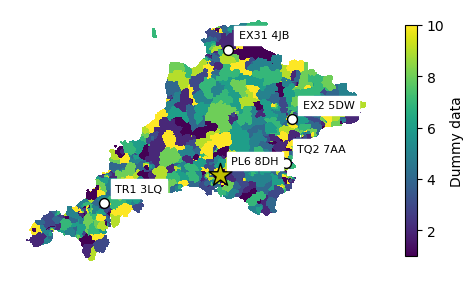

In [30]:
range = max(np.abs(np.max(lsoa_data_gdf['Value'])),
            np.abs(np.min(lsoa_data_gdf['Value'])))

fig, ax = plt.subplots(figsize=(6, 6)) # Make max dimensions XxY inch

# Draw the main map with colours (choropleth):
lsoa_data_gdf.plot(
    ax=ax,              # Set which axes to use for plot (only one here)
    column='Value',     # Column to apply colour
    antialiased=False,  # Avoids artifact boundry lines
    edgecolor='face',   # Make LSOA boundry same colour as area
    # vmin=-range,        # Manual scale min (remove to make automatic)
    # vmax=range,         # Manual scale max (remove to make automatic)
    cmap='viridis',     # Colour map to use
    legend_kwds={
        'shrink':0.5,   # Adjust size of colourmap key
        'label':'Dummy data'  # Add label
    },
    legend=True         # Set to display legend
    )

# Scatter marker for each hospital:
hospitals_gdf.plot(
    ax=ax,
    edgecolor='k',
    facecolor='w',
    markersize=50, 
    marker='o'
    )

# Scatter marker star for MT/MSU units:
mask = hospitals_gdf['Use_MT'] == '1'
MSU = hospitals_gdf[mask]
MSU.plot(
    ax=ax,
    edgecolor='k',
    facecolor='y',
    markersize=300,
    marker='*'
    )

# Add labels
# Define "z" to shorten following "for" line:
z = zip(
    hospitals_gdf.geometry.x,
    hospitals_gdf.geometry.y,
    hospitals_gdf.Hospital_name
    )
for x, y, label in z:
    # Edit the label to put a space in the postcode when displayed:
    label = f'{label[:-3]} {label[-3:]}'
    # Place the label slightly offset from the
    # exact hospital coordinates (x, y).
    ax.annotate(
        label, xy=(x, y), xytext=(8, 8),
        textcoords="offset points",
        backgroundcolor="w", fontsize=8
        )

ax.set_axis_off()  # Turn off axis line and numbers
plt.savefig('example_map_geopandas.jpg', dpi=300, bbox_inches='tight')  # Save figure
plt.show()